<h3>Disciplina: Apredizado Não supervisionado</h3>

<span style='font-weight:bold'>Alunos:</span>
<ul>
    <li>Max Pinheiro</li>
    <li>Tiago Rocha</li>
    <li>Francisco J dos Santos</li>
<ul>

<h1>Agrupamento de Perfis - Teste HBDI </h1>
<p><strong>Contexto</strong></p>
<p>Agrupar pessoas levando em consideração os perfis comportamentais, mapeados com o resultado do Teste HDBI.</p>

<h4>O teste HBDI</h4>
<p>O HBDI ou Teste de Dominância Cerebral baseia-se em questões propostas nos estudos de Ned Hermann sobre criatividade e dominância Cerebral.</p>

<p>O HBDI "classifica os estilos de pensamento em relacao ao lado do cerebro dominante. Pessoas dominadas pelo lado esquerdo sao descritas como analiticas, logicas e sequenciais. As dominadas pelo lado direito sao mais intuitivas, baseadas em valores e nao-lineares."</p><small style='color: gray'>fonte: https://www.personalidades.mobi/Dominancia_Cerebral/</small>

<p>De acordo com um conjunto de 40 perguntas objetivas, cada uma com peso 1, calcula-se a soma dos resultados de cada grupo o que poderá indicar a qual predominância cerebral do participante:</p>
<ul>
    <li>Experimental</li>
    <li>Analítico</li>
    <li>Relacional</li>
    <li>Prático</li>
</ul>

<h4>Uso do HBDI</h4>

<p>A organização utiliza o resultado do HBDI para formar times que participarão de projetos ou atividades criativas.</p>
<p>Em muitos casos há a necessidade de que o time a ser formado seja composto por pessoas com carcterísticas distintas, heterogêneas e multidisciplinares.</p>
<p>Práticas, indicam que mantendo pessoas com diferentes características tende a contribuir fortemente com o sucesso dos trabalhos. </p>

<h4>O Problema</h4>

<p>Alguns testes apresentam resultados que tornam difícil a classificação da predominância em um dos grupos (Experimental, Analítico, Relacional ou Prático), como os exemplos abaixo:</p>

<table>
    <tr style='font-weight: bold;'>
        <td>Participante</td>
        <td>Experimental</td>
        <td>Analítico</td>
        <td>Relacional</td>
        <td>Prático</td>
    </tr>
    <tr>
        <td>A</td>
        <td>6</td>
        <td>11</td>
        <td>12</td>
        <td>11</td>
    </tr>
    <tr>
        <td>B</td>
        <td>12</td>
        <td>10</td>
        <td>10</td>
        <td>8</td>
    </tr>
    <tr>
        <td>C</td>
        <td>11</td>
        <td>11</td>
        <td>12</td>
        <td>6</td>
    </tr>
</table>

<p>Como classificar em um dos grupos os participantes acima?</p>

<h4>Proposta de Solução</h4>
<p>Utilizar o processo para agrupamento de dados, <strong>K-means</strong>, baseando-se no conceito de similaridade entre as variáveis, encontrar semelhnaças de acordo com os atributos de cada participante.</p>

<p>O resultado esperado será classes ou grupos de pessoas com caraterísticas próximas.</p>

<h4>Bibliotecas necessárias</h4>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

<h4>A base de dados</h4>

In [2]:
#base com as características dos participantes, obtidas nos testes
dados = pd.read_csv('C:/Developer/base_teste_hbdi.csv')

In [3]:
dados.shape

(310, 9)

In [4]:
dados.head()

,userId,userName,userCode,management,countSD,countSE,countID,countIE,dataRegistro
0,2,Max Pinheiro,F7098849,8969,6,16,6,12,2019-01-11 10:01:17
1,3,MARCELO SCHARMACH,F6771265,8969,22,3,14,1,2019-01-11 10:01:17
2,4,Juliana,F6002194,8969,14,8,13,5,2019-01-11 10:01:17
3,5,Leonardo Meneses de Lima,f6210447,8558,20,5,13,2,2019-01-11 10:01:17
4,6,Alessandra Camargo Vieira,f0427258,8558,9,3,21,7,2019-01-11 10:01:17


In [5]:
dados.head()

,userId,userName,userCode,management,countSD,countSE,countID,countIE,dataRegistro
0,2,Max Pinheiro,F7098849,8969,6,16,6,12,2019-01-11 10:01:17
1,3,MARCELO SCHARMACH,F6771265,8969,22,3,14,1,2019-01-11 10:01:17
2,4,Juliana,F6002194,8969,14,8,13,5,2019-01-11 10:01:17
3,5,Leonardo Meneses de Lima,f6210447,8558,20,5,13,2,2019-01-11 10:01:17
4,6,Alessandra Camargo Vieira,f0427258,8558,9,3,21,7,2019-01-11 10:01:17


In [6]:
dados.describe()

,userId,management,countSD,countSE,countID,countIE
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,166.774194,8429.190323,9.106452,10.993548,9.974194,9.919355
std,103.834013,1265.842966,4.133487,4.297206,4.317419,3.697714
min,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,79.250000,7423.000000,6.000000,8.000000,7.000000,7.000000
50%,157.500000,8558.000000,8.000000,11.000000,10.000000,10.000000
75%,235.750000,9101.000000,11.000000,15.000000,13.000000,12.000000
max,356.000000,9984.000000,27.000000,21.000000,25.000000,20.000000


In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
print(dados['userName'].values[0:5])

['Max Pinheiro' 'MARCELO SCHARMACH' 'Juliana' 'Leonardo Meneses de Lima'
 'Alessandra Camargo Vieira']


In [9]:
len(dados)

310

<h4>Seprando os dados de treinamento</h4>

In [10]:
#serão utilizados apenas as características consideradas relevantes
dados_array = []

for x in range(0,len(dados)):
    lista = []
    lista.append(dados['countSD'].values[x])
    lista.append(dados['countSE'].values[x])
    lista.append(dados['countID'].values[x])
    lista.append(dados['countIE'].values[x])
    dados_array.append(lista)

#outra forma de separar os dados:
#dados.iloc[:,4:8]

In [11]:
print(dados_array)

[[6, 16, 6, 12], [22, 3, 14, 1], [14, 8, 13, 5], [20, 5, 13, 2], [9, 3, 21, 7], [6, 15, 8, 11], [16, 6, 10, 8], [9, 10, 13, 8], [6, 6, 20, 8], [17, 12, 9, 2], [13, 17, 4, 6], [10, 11, 7, 12], [11, 13, 7, 9], [5, 4, 20, 11], [10, 15, 8, 7], [12, 8, 11, 9], [8, 13, 11, 8], [8, 14, 7, 11], [6, 7, 8, 19], [15, 1, 21, 3], [5, 16, 14, 5], [14, 11, 10, 5], [10, 9, 13, 8], [5, 13, 16, 6], [10, 6, 9, 15], [18, 5, 10, 7], [11, 7, 14, 8], [14, 5, 12, 9], [7, 8, 18, 7], [7, 5, 21, 7], [9, 15, 8, 8], [7, 19, 5, 9], [6, 9, 19, 6], [5, 11, 12, 12], [9, 16, 4, 11], [20, 6, 9, 5], [5, 14, 6, 15], [7, 7, 19, 7], [7, 16, 9, 8], [6, 12, 11, 11], [5, 7, 12, 16], [3, 15, 6, 16], [10, 10, 14, 7], [11, 11, 12, 6], [9, 11, 13, 7], [13, 13, 8, 6], [13, 6, 15, 6], [9, 16, 7, 8], [8, 16, 7, 9], [8, 10, 12, 10], [9, 8, 14, 9], [9, 8, 18, 5], [11, 9, 4, 16], [10, 4, 20, 6], [18, 3, 15, 4], [4, 13, 16, 7], [9, 11, 10, 10], [13, 6, 13, 8], [13, 6, 10, 11], [3, 9, 15, 13], [4, 9, 13, 14], [7, 7, 11, 15], [7, 9, 12, 12

<h4>Criando o modelo com K-means</h4>

In [12]:
#criação do modelo
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=None)

In [13]:
#atribuir os resultados(classes) a uma coluna 'clusters'
dados['clusters'] = kmeans.fit_predict(dados_array)

In [14]:
print(dados['clusters'])

0      1
1      3
2      3
3      3
4      0
5      1
6      3
7      0
8      0
9      3
10     1
11     1
12     1
13     0
14     1
15     3
16     1
17     1
18     2
19     3
20     0
21     3
22     0
23     0
24     2
25     3
26     0
27     3
28     0
29     0
      ..
280    2
281    3
282    2
283    1
284    1
285    3
286    0
287    2
288    0
289    0
290    0
291    3
292    2
293    0
294    1
295    1
296    3
297    2
298    1
299    3
300    0
301    1
302    0
303    0
304    1
305    1
306    1
307    0
308    1
309    1
Name: clusters, Length: 310, dtype: int32


In [15]:
#resumo da coluna
dados['clusters'].value_counts()

1    110
0     88
3     57
2     55
Name: clusters, dtype: int64

In [16]:
#resumo da coluna, visão % percentual
dados['clusters'].value_counts(normalize=True)

1    0.354839
0    0.283871
3    0.183871
2    0.177419
Name: clusters, dtype: float64

In [17]:
dados.head()

,userId,userName,userCode,management,countSD,countSE,countID,countIE,dataRegistro,clusters
0,2,Max Pinheiro,F7098849,8969,6,16,6,12,2019-01-11 10:01:17,1
1,3,MARCELO SCHARMACH,F6771265,8969,22,3,14,1,2019-01-11 10:01:17,3
2,4,Juliana,F6002194,8969,14,8,13,5,2019-01-11 10:01:17,3
3,5,Leonardo Meneses de Lima,f6210447,8558,20,5,13,2,2019-01-11 10:01:17,3
4,6,Alessandra Camargo Vieira,f0427258,8558,9,3,21,7,2019-01-11 10:01:17,0


In [130]:
#salvando os dados
dados.to_csv('C:/Developer/base_teste_hbdi_clusterizado.csv')

<h4>Padronizando os dados</h4>

<p>É importante padronizar os dados antes de aplicar o PCA.< /br>
 O <strong>StandardScaler</strong> vai ajudar a padronizar em conjunto de escalas, onde média = 0 e variância = 1.</p>

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
standard = StandardScaler().fit_transform(dados_array)

In [22]:
print(standard)

[[-0.75274794  1.16693181 -0.92199041  0.56359397]
 [ 3.12433386 -1.86318107  0.93396431 -2.41602688]
 [ 1.18579296 -0.69775304  0.70196997 -1.33252839]
 ...
 [ 0.21652251 -1.86318107  0.93396431  0.8344686 ]
 [-0.0257951   1.16693181 -1.15398475  0.02184473]
 [ 1.18579296  1.40001741 -1.61797343 -1.06165376]]


<h4>Projeção PCA em 2D</h4>
<p>O dataset original tem 4 colunas (features) que serão reduzidas a 2 dimencionalidades. < /br>
Os novos componentes são as duas <strong>principais</strong> dimensões.
</p>

In [25]:
from sklearn.decomposition import PCA

In [27]:
#dois componentes principais
pca = PCA(n_components=2)

In [29]:
#os componentes principais são gerados a partir dos dados padronizados
componentes_principais = pca.fit_transform(standard)

In [31]:
#transformar os componentes principais em um dataFrame, usando o Pandas
df_principal = pd.DataFrame(data = componentes_principais, columns = ['Compo_Principais_1','Compo_Principais_2'])

In [33]:
df_principal.head()

,Compo_Principais_1,Compo_Principais_2
0,-1.720475,0.304171
1,4.127837,1.586645
2,1.934907,0.625774
3,3.398546,1.513626
4,2.648828,-1.781165


In [35]:
#concatenando as marcações aos componentes principais, ao longo do eixo 1 
df_final = pd.concat([df_principal,dados['clusters']], axis=1)

In [36]:
df_final.head()

,Compo_Principais_1,Compo_Principais_2,clusters
0,-1.720475,0.304171,1
1,4.127837,1.586645,3
2,1.934907,0.625774,3
3,3.398546,1.513626,3
4,2.648828,-1.781165,0


<h4>Projeção 2D</h4>
<p>Visualização dos dados em 2 dimensões.</p>

<h5>Características do Gráfico</h5>

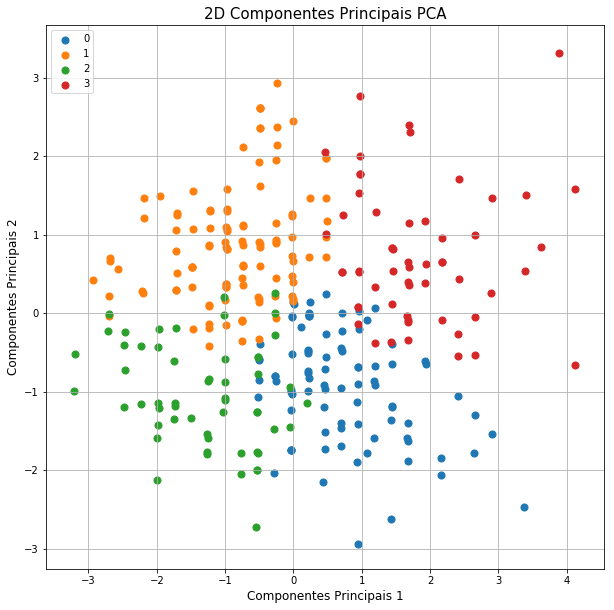

In [44]:
#tamanho do gráfico
grafico = plt.figure(figsize=(10,10))#largura e altura

#n_linhas, n_colunas, indices
eixo = grafico.add_subplot(1,1,1)

#rótulo do eixo X
eixo.set_xlabel('Componentes Principais 1', fontsize=12)

#rótulo do eixo y
eixo.set_ylabel('Componentes Principais 2', fontsize=12)

#título
eixo.set_title('2D Componentes Principais PCA', fontsize=15)

#legendas - referente aos clusters
legendas = [0, 1, 2, 3]

#cores da legenda
cores = ['r','g','b', 'o']

#percorrer as duas sequências de elementos
for legenda, cor in zip(legendas, cores):
    indice = df_final['clusters'] == legenda
    eixo.scatter(df_final.loc[indice, 'Compo_Principais_1']
                ,df_final.loc[indice, 'Compo_Principais_2']
                #, c = cores #cores
                , s=50)#scala
eixo.legend(legendas)#legendas
eixo.grid()#grades

<h3>Conclusão</h3>

<p><strong>A aplicação do modelo</strong>, para agrupar pessoas de acordo com seus perfis comportamentais, <strong>têm se mostrado efetiva</strong>.
 Ainda que poucos testes reais tenham sido realizados e não obstante a necessidade da inclusão de outras variáveis,<strong> o modelo é visto por profissionais consultados e que são responsáveis pela construção de equipes como muito promissor, visto que facilita o trabalho de composição de times</strong>.</p>
 
<p>O modelo pode ser apremimorado, como dito acima, incluindo mais variáveis e outras características das pessoas que possam ser usadas (ética, responsabilidade, comunicação etc), ou ainda experimentando e comparando outros métodos de clusterização.</p>

<p><strong>Outras possibilidades de aplicação</strong></p>

<p>Além de ajudar na formação de equipes, o modelo, com os devidos aprimoramentos, tem potencial para ser usado em seleções de candidatos, na alocação de pessoas com determinados perfis para vagas que exijam skills mapeados ou ainda na otimização de recursos financeiros, como por exemplo: identificar que são as pessoas certas para um treinamento.</p>
